### Importing some library for packages using through out this lab

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

### Useful module for analyze overfitting and underfitting by max_depth

In [ ]:
def analyzer(max_depth):
  data = pd.read_csv('/content/Social_Network_Ads.csv')
  X = data.iloc[:, 2:4].values
  y = data.iloc[:, -1].values

  clf = DecisionTreeClassifier(max_depth=max_depth)
  clf.fit(X,y)

  a = np.arange(start= X[:, 0].min()-1, stop= X[:, 0].max()+1, step=0.1)
  b = np.arange(start= X[:, 1].min()-1, stop= X[:, 1].max()+1, step=100)

  XX, YY =np.meshgrid(a,b)

  input_array = np.array([XX.ravel(), YY.ravel()]).T

  labels = clf.predict(input_array)

  plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
  plt.scatter(X[:, 0], X[:, 1], c=y)


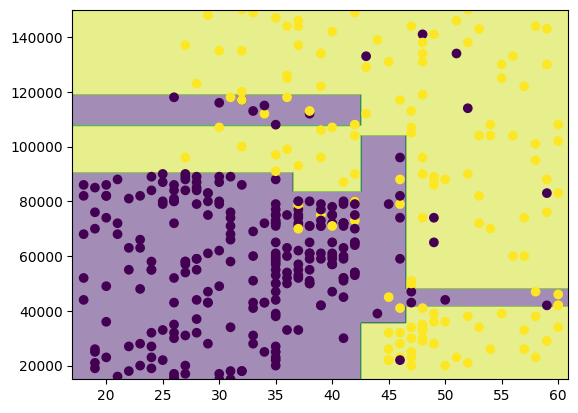

In [ ]:
analyzer(max_depth=4)

### dtreeviz library for the visualization of decision tree in elegant way!!!

In [ ]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00


In [ ]:
import graphviz.backend as be
from sklearn.datasets import *
from dtreeviz.trees import *
from dtreeviz import dtreeviz
from IPython.display import Image, display_svg, SVG
from sklearn.tree import plot_tree

In [ ]:
clas = tree.DecisionTreeClassifier(max_depth=2)
iris = load_iris()

X_train  = iris.data
y_train = iris.target

X_train = np.array(X_train)
y_train = np.array(y_train)
clas.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'), Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'), Text(0.30000000000000004, 0.6666666666666667, 'True  '), Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'), Text(0.5, 0.6666666666666667, '  False'), Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'), Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]


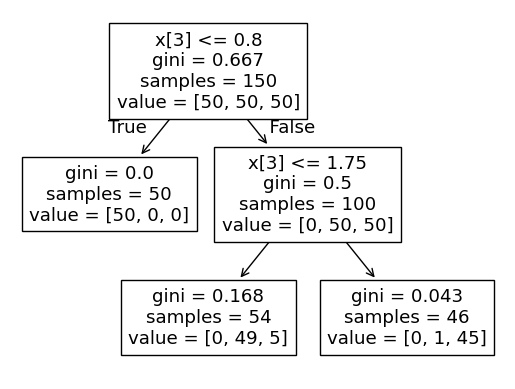

In [ ]:
print(plot_tree(clas))

1. Classification

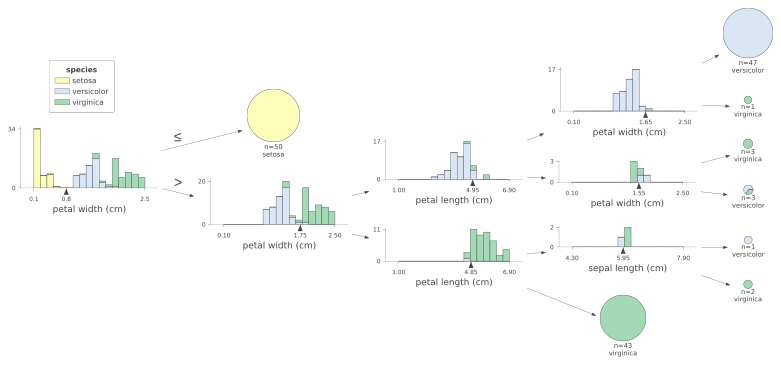

In [ ]:
import warnings
import matplotlib.pyplot as plt
import os



# Suppress specific matplotlib warning
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib.axes._base")
logging.getLogger("matplotlib.axes._base").setLevel(logging.ERROR)



# Your dtreeviz code
import dtreeviz

viz_model = dtreeviz.model(clas,
                          X_train=X_train,
                          y_train=y_train,
                          feature_names=list(iris.feature_names),
                          target_name='species',
                          class_names=['setosa', 'versicolor', 'virginica'])

viz_model.view(orientation="LR")

2. Regression

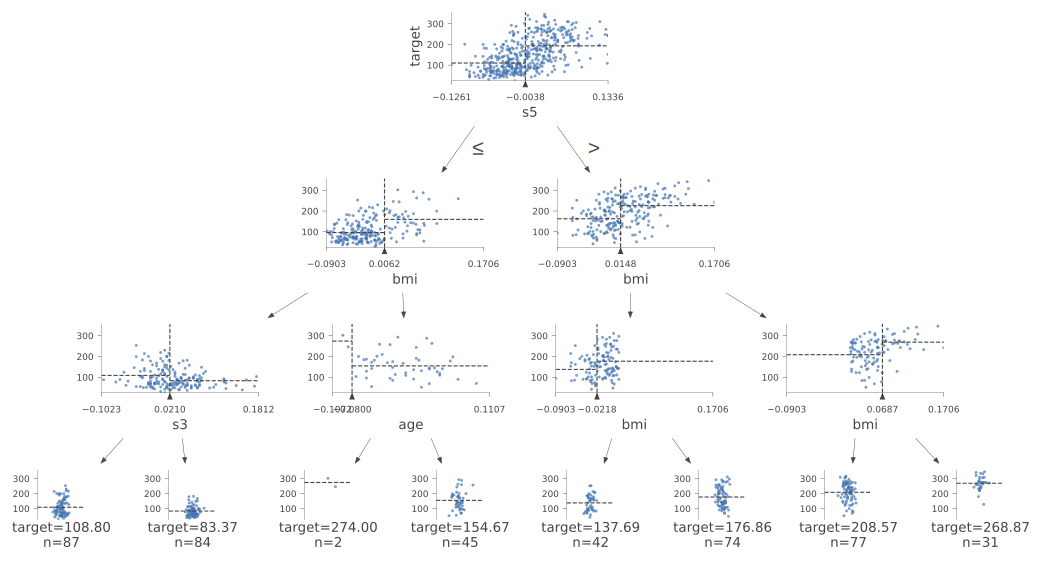

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth=3)
diabetes = load_diabetes()

X_train = diabetes.data
y_train = diabetes.target

regr.fit(X_train, y_train)

viz = dtreeviz.model(
                       regr,
                       X_train = X_train,
                       y_train = y_train,
                       feature_names= list(diabetes.feature_names),
                       target_name="target")

viz.view(scale=1.5)

## 3 .Shows path of particular input

[6.3 2.5 4.9 1.5]


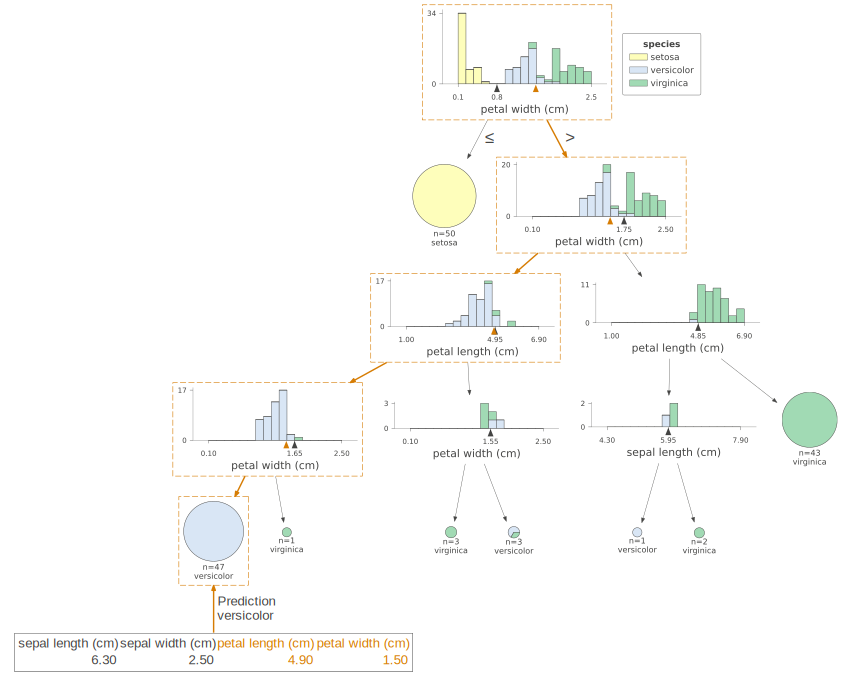

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import warnings
import dtreeviz

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load model and data
clas = tree.DecisionTreeClassifier(max_depth=4)
iris = load_iris()
X_train = np.array(iris.data)
y_train = np.array(iris.target)
clas.fit(X_train, y_train)

# Random sample input
random_index = np.random.randint(0, len(iris.data))
sample_data = iris.data[random_index, :]

print(sample_data)
# Create the dtreeviz visualizer
viz_model = dtreeviz.model(clas,
                           X_train=X_train,
                           y_train=y_train,
                           feature_names=iris.feature_names,
                           target_name='species',
                           class_names=list(iris.target_names))

# Visualize the decision path for that sample index
viz_model.view(x=sample_data,
               scale = 1.2,
               orientation="TD")



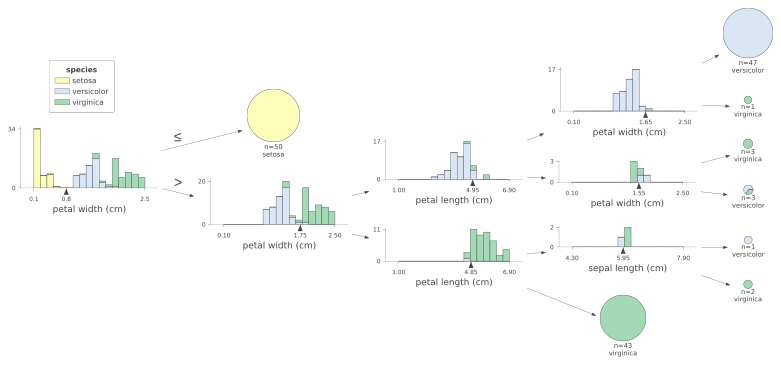

In [ ]:
viz_model = dtreeviz.model(clas,
                          X_train=X_train,
                          y_train=y_train,
                          feature_names=list(iris.feature_names),
                          target_name='species',
                          class_names=['setosa', 'versicolor', 'virginica'])

viz_model.view(orientation="LR",
               )

## 5. Without Any graphs

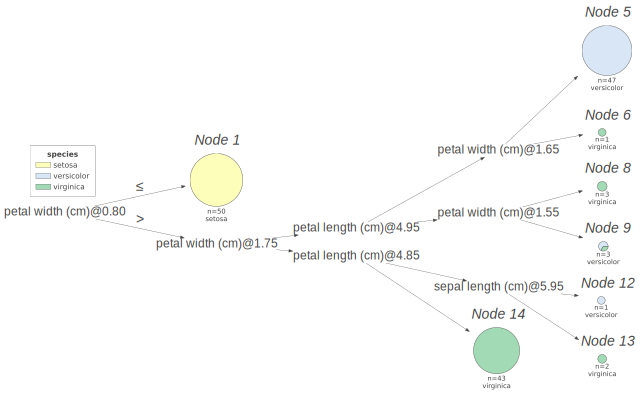

In [ ]:
viz_model = dtreeviz.model(clas,
                          X_train=X_train,
                          y_train=y_train,
                          feature_names=list(iris.feature_names),
                          target_name='species',
                          class_names=['setosa', 'versicolor', 'virginica'])

viz_model.view(orientation="LR",
               show_node_labels=True,
               fancy=False)

## 6. Show just prediction path, nothing else

[4.9 3.6 1.4 0.1]


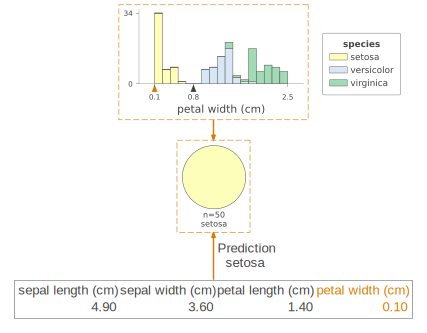

In [ ]:
from sklearn import tree
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import warnings
import dtreeviz

# Suppress all warnings
warnings.filterwarnings('ignore')

# Load model and data
clas = tree.DecisionTreeClassifier(max_depth=4)
iris = load_iris()
X_train = np.array(iris.data)
y_train = np.array(iris.target)
clas.fit(X_train, y_train)

# Random sample input
random_index = np.random.randint(0, len(iris.data))
sample_data = iris.data[random_index, :]

print(sample_data)
# Create the dtreeviz visualizer
viz_model = dtreeviz.model(clas,
                           X_train=X_train,
                           y_train=y_train,
                           feature_names=iris.feature_names,
                           target_name='species',
                           class_names=list(iris.target_names))

# Visualize the decision path for that sample index
viz_model.view(x=sample_data,
               scale = 1.2,
               orientation="TD",
               show_just_path = True,
               )

## Univariate Regression

In [ ]:
df_boston = pd.read_csv('/content/Boston.csv')
X, y = df_boston[['age']], df_boston['medv']

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=3, criterion="friedman_mse")
dt.fit(X, y)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

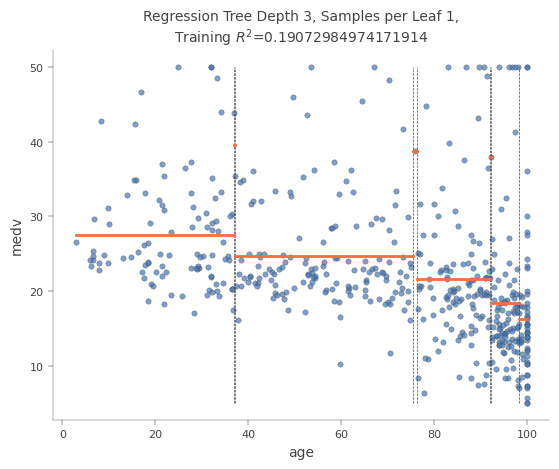

In [ ]:
from dtreeviz import rtreeviz_univar
fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'age','medv', ax=ax)
plt.show()